# Création du dataset utilisé pour entraîner les modèles

In [98]:
# Importation des modules et packages
import shutil
import pathlib

import numpy as np
import pandas as pd

## 1 - Tomate

### 1.1 - Tomato Village dataset

In [99]:
# Source: Tomato-Village (Multi-label classification)
tomato_village = pd.read_csv(
    "../data/Tomato-Village-main/Variant-b(MultiLabel Classification)/Multi-Label dataset - with augmented.csv"
)

# On remplace les NaN par 0
tomato_village = tomato_village.fillna(0)

tomato_village

,dataset,filename,path,Early blight,Healthy,Late blight,Leaf Miner,Magnesium Deficiency,Nitrogen Deficiency,Pottassium Deficiency,Spotted Wilt Virus,SUM
0,test,IMG20220323100545_1.jpg,\test\Early_blight,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,test,IMG20220323102226_1.jpg,\test\Early_blight,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,test,IMG20220323102423_7.jpg,\test\Early_blight,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,test,IMG20220323102851_4.jpg,\test\Early_blight,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,test,IMG20220323103905_4.jpg,\test\Early_blight,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5648,val,IMG20220325134421.jpg,\val\Spotted Wilt Virus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5649,val,IMG20220325140005.jpg,\val\Spotted Wilt Virus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5650,val,IMG20220325142048.jpg,\val\Spotted Wilt Virus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5651,val,IMG20220324104742.jpg,\val\Spotted Wilt Virus_Magnesium Deficiency,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2


In [100]:
# Ajouter la source
tomato_village_dataset = tomato_village.copy()
tomato_village_dataset["source"] = "tomato_village"

# Sélectionner les bonnes colonnes
cols = [
    "filename",
    "source",
    "Healthy",
    "Early blight",
    "Late blight",
    "Leaf Miner",
    "Magnesium Deficiency",
    "Nitrogen Deficiency",
    "Pottassium Deficiency",
    "Spotted Wilt Virus",
]

# Classes
classes = [
    "healthy",
    "early_blight",
    "late_blight",
    "leaf_miner",
    "magnesium_deficiency",
    "nitrogen_deficiency",
    "potassium_deficiency",
    "spotted_wilt_virus",
]

tomato_village_dataset = tomato_village_dataset[cols]
tomato_village_dataset.columns = ["filename", "source"] + classes

# Remplacer les espaces par des _
tomato_village_dataset["filename"] = tomato_village_dataset["filename"].str.replace(
    " ", "_"
)

tomato_village_dataset

,filename,source,healthy,early_blight,late_blight,leaf_miner,magnesium_deficiency,nitrogen_deficiency,potassium_deficiency,spotted_wilt_virus
0,IMG20220323100545_1.jpg,tomato_village,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,IMG20220323102226_1.jpg,tomato_village,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,IMG20220323102423_7.jpg,tomato_village,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,IMG20220323102851_4.jpg,tomato_village,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,IMG20220323103905_4.jpg,tomato_village,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5648,IMG20220325134421.jpg,tomato_village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5649,IMG20220325140005.jpg,tomato_village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5650,IMG20220325142048.jpg,tomato_village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5651,IMG20220324104742.jpg,tomato_village,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [101]:
# Copier les images de Tomato-Village
source = pathlib.Path(
    "../data/Tomato-Village-main/Variant-b(MultiLabel Classification)"
)
dest = pathlib.Path("tomato")

for file, sub in zip(tomato_village["filename"], tomato_village["dataset"]):
    if not (dest / file).exists():
        shutil.copy2(source / sub / file, dest / file.replace(" ", "_"))

### 1.2 - Dataset for Crop Pest and Disease Detection

On ne peut pas utiliser toutes les classes de ce dataset. Premièremente, la classe
"leaf blight" pourrait être causée par le "Early blight" ou "Late blight". Il faudrait
manuellemenet trouver les photos correspondant à chacune de ces deux divisions. Aussi,
il semble que "leaf curl" soit un symptôme qui peut être causé par plusieurs problèmes,
mais il existe un virus, le "yellow leaf curl virus" qui en est souvent la cause. On
va assumer pour ce projet que la classe "leaf curl" correspond à ce virus.

In [102]:
# Classes
classes = [
    "healthy",
    "yellow_leaf_curl_virus",
    "septoria_leaf_spot",
    "verticulium_wilt",
]

source_classes = [
    "healthy",
    "leaf curl",
    "septoria leaf spot",
    "verticulium wilt"
]

sets = ["test_set", "train_set"]

# ccmt_dataset = pd.DataFrame(columns=["filename", "source"] + classes)
ccmt_dataset = []

# Copier les images et écrire dans le dataset
source = pathlib.Path(
    "../data/Dataset for Crop Pest and Disease Detection/CCMT Dataset-Augmented/Tomato"
)
dest = pathlib.Path("tomato")

for c, sc in zip(classes, source_classes):
    for s in sets:
        files = list((source / s / sc).iterdir())
        filenames = [f.name for f in files]

        tmp_dataset = pd.DataFrame(
            {
                "filename": "",
                "source": "ccmt",
                "healthy": 0.0,
                "yellow_leaf_curl_virus": 0.0,
                "septoria_leaf_spot": 0.0,
                "verticulium_wilt": 0.0,
            },
            index=range(len(filenames)),
            columns=["filename", "source"] + classes,
        )

        tmp_dataset["filename"] = filenames
        tmp_dataset["filename"] = tmp_dataset["filename"].str.replace(" ", "_")
        tmp_dataset[c] = 1
        ccmt_dataset.append(tmp_dataset)

        # Copie du fichier
        for f in files:
            if not (dest / f.name).exists():
                shutil.copy2(f, dest / f.name.replace(" ", "_"))


ccmt_dataset = pd.concat(ccmt_dataset, ignore_index=True)
ccmt_dataset

,filename,source,healthy,yellow_leaf_curl_virus,septoria_leaf_spot,verticulium_wilt
0,104tomato_valid_healthy.JPG,ccmt,1.0,0.0,0.0,0.0
1,101tomato_valid_healthy.JPG,ccmt,1.0,0.0,0.0,0.0
2,106tomato_valid_healthy.JPG,ccmt,1.0,0.0,0.0,0.0
3,100tomato_valid_healthy.JPG,ccmt,1.0,0.0,0.0,0.0
4,105tomato_valid_healthy.JPG,ccmt,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
20654,998tomato_train_verticulium_wilt.JPG,ccmt,0.0,0.0,0.0,1.0
20655,999tomato_train_verticulium_wilt.JPG,ccmt,0.0,0.0,0.0,1.0
20656,9tomato_train_verticulium_wilt.JPG,ccmt,0.0,0.0,0.0,1.0
20657,99tomato_train_verticulium_wilt.JPG,ccmt,0.0,0.0,0.0,1.0


### 1.3 PlantDoc

In [103]:
# Classes
classes = [
    "healthy",
    "early_blight",
    "late_blight",
    "mosaic_virus",
    "yellow_leaf_curl_virus",
    "septoria_leaf_spot",
]

source_classes = [
    "Tomato leaf",
    "Tomato Early blight leaf",
    "Tomato leaf late blight",
    "Tomato leaf mosaic virus",
    "Tomato leaf yellow virus",
    "Tomato Septoria leaf spot",
]

sets = ["test", "train"]

# ccmt_dataset = pd.DataFrame(columns=["filename", "source"] + classes)
plantdoc_dataset = []

# Copier les images et écrire dans le dataset
source = pathlib.Path("../data/PlantDoc-Dataset-master")
dest = pathlib.Path("tomato")

for c, sc in zip(classes, source_classes):
    for s in sets:
        files = list((source / s / sc).iterdir())
        filenames = [f.name for f in files]

        tmp_dataset = pd.DataFrame(
            {
                "filename": "",
                "source": "plantdoc",
                "healthy": 0.0,
                "early_blight": 0.0,
                "late_blight": 0.0,
                "mosaic_virus": 0.0,
                "yellow_virus": 0.0,
                "septoria_leaf_spot": 0.0,
                "verticulium_wilt": 0.0,
            },
            index=range(len(filenames)),
            columns=["filename", "source"] + classes,
        )

        tmp_dataset["filename"] = filenames
        tmp_dataset["filename"] = tmp_dataset["filename"].str.replace(" ", "_")
        tmp_dataset[c] = 1
        tmp_dataset = tmp_dataset.drop_duplicates()
        plantdoc_dataset.append(tmp_dataset)

        # Copie du fichier
        for f in files:
            if not (dest / f.name).exists():
                shutil.copy2(f, dest / f.name.replace(" ", "_"))


plantdoc_dataset = pd.concat(plantdoc_dataset, ignore_index=True)
plantdoc_dataset

,filename,source,healthy,early_blight,late_blight,mosaic_virus,yellow_leaf_curl_virus,septoria_leaf_spot
0,1684.jpg,plantdoc,1.0,0.0,0.0,0.0,NaN,0.0
1,2013-08-20-06.jpg,plantdoc,1.0,0.0,0.0,0.0,NaN,0.0
2,90e2c0.jpg,plantdoc,1.0,0.0,0.0,0.0,NaN,0.0
3,DSCN1015.JPG.jpg,plantdoc,1.0,0.0,0.0,0.0,NaN,0.0
4,IMG_1246.jpg,plantdoc,1.0,0.0,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...
538,tomatoseptorialeafspotjpg-788d20798a3c74e7.jpg,plantdoc,0.0,0.0,0.0,0.0,NaN,1.0
539,vdu-tomato-sept-eb-285x300.jpg,plantdoc,0.0,0.0,0.0,0.0,NaN,1.0
540,web1_copy_tomato-septoria-leaf-spot4.jpg,plantdoc,0.0,0.0,0.0,0.0,NaN,1.0
541,x3-most-common-types-tomato-blight.jpg.pagespe...,plantdoc,0.0,0.0,0.0,0.0,NaN,1.0


In [104]:
plantdoc_dataset.drop_duplicates()

,filename,source,healthy,early_blight,late_blight,mosaic_virus,yellow_leaf_curl_virus,septoria_leaf_spot
0,1684.jpg,plantdoc,1.0,0.0,0.0,0.0,NaN,0.0
1,2013-08-20-06.jpg,plantdoc,1.0,0.0,0.0,0.0,NaN,0.0
2,90e2c0.jpg,plantdoc,1.0,0.0,0.0,0.0,NaN,0.0
3,DSCN1015.JPG.jpg,plantdoc,1.0,0.0,0.0,0.0,NaN,0.0
4,IMG_1246.jpg,plantdoc,1.0,0.0,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...
538,tomatoseptorialeafspotjpg-788d20798a3c74e7.jpg,plantdoc,0.0,0.0,0.0,0.0,NaN,1.0
539,vdu-tomato-sept-eb-285x300.jpg,plantdoc,0.0,0.0,0.0,0.0,NaN,1.0
540,web1_copy_tomato-septoria-leaf-spot4.jpg,plantdoc,0.0,0.0,0.0,0.0,NaN,1.0
541,x3-most-common-types-tomato-blight.jpg.pagespe...,plantdoc,0.0,0.0,0.0,0.0,NaN,1.0


### 1.4 - Plant village dataset
Attention à la licence CC-BY-NC-SA...

In [105]:
# Classes
classes = [
    "healthy",
    "early_blight",
    "late_blight",
    "mosaic_virus",
    "yellow_leaf_curl_virus",
    "septoria_leaf_spot",
]

source_classes = [
    "Tomato___healthy",
    "Tomato___Early_blight",
    "Tomato___Late_blight",
    "Tomato___Tomato_mosaic_virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Septoria_leaf_spot",
]


# ccmt_dataset = pd.DataFrame(columns=["filename", "source"] + classes)
plantvillage_dataset = []

# Copier les images et écrire dans le dataset
source = pathlib.Path("../data/plantvillage dataset/color/")
dest = pathlib.Path("tomato")

for c, sc in zip(classes, source_classes):
    files = list((source / sc).iterdir())
    filenames = [f.name for f in files]

    tmp_dataset = pd.DataFrame(
        {
            "filename": "",
            "source": "plantvillage",
            "healthy": 0.0,
            "early_blight": 0.0,
            "late_blight": 0.0,
            "mosaic_virus": 0.0,
            "yellow_leaf_curl_virus": 0.0,
            "septoria_leaf_spot": 0.0,
            "verticulium_wilt": 0.0,
        },
        index=range(len(filenames)),
        columns=["filename", "source"] + classes,
    )

    tmp_dataset["filename"] = filenames
    tmp_dataset["filename"] = tmp_dataset["filename"].str.replace(" ", "_")
    tmp_dataset[c] = 1
    tmp_dataset = tmp_dataset.drop_duplicates()
    plantvillage_dataset.append(tmp_dataset)

    # Copie du fichier
    for f in files:
        if not (dest / f.name).exists():
            shutil.copy2(f, dest / f.name.replace(" ", "_"))


plantvillage_dataset = pd.concat(plantvillage_dataset, ignore_index=True)
plantvillage_dataset

,filename,source,healthy,early_blight,late_blight,mosaic_virus,yellow_leaf_curl_virus,septoria_leaf_spot
0,000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL_L...,plantvillage,1.0,0.0,0.0,0.0,0.0,0.0
1,000bf685-b305-408b-91f4-37030f8e62db___GH_HL_L...,plantvillage,1.0,0.0,0.0,0.0,0.0,0.0
2,0031da2a-8edd-468f-a8b1-106657717a32___RS_HL_0...,plantvillage,1.0,0.0,0.0,0.0,0.0,0.0
3,003944fc-3b99-4a0f-9ed4-0e07352fd8b3___RS_HL_9...,plantvillage,1.0,0.0,0.0,0.0,0.0,0.0
4,00bce074-967b-4d50-967a-31fdaa35e688___RS_HL_0...,plantvillage,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
11996,ffbb4b17-6760-48fd-bbfa-70120a53db86___Matt.S_...,plantvillage,0.0,0.0,0.0,0.0,0.0,1.0
11997,ffcd08b6-6533-422a-a365-271e11890f98___Matt.S_...,plantvillage,0.0,0.0,0.0,0.0,0.0,1.0
11998,ffd3c6f3-17d3-45f1-a599-2623e111ec71___Matt.S_...,plantvillage,0.0,0.0,0.0,0.0,0.0,1.0
11999,ffe98ff9-be33-4e8f-82f0-7b7c21b02958___JR_Sept...,plantvillage,0.0,0.0,0.0,0.0,0.0,1.0


### 1.5 - Création du dataset final

In [106]:
# Concaténation des dataframes
dataset = [tomato_village_dataset, ccmt_dataset, plantdoc_dataset, plantvillage_dataset]

dataset = pd.concat(dataset, axis=0, ignore_index=True)
dataset = dataset.fillna(0.0)
dataset

/tmp/ipykernel_9909/364207650.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.fillna(0.0)


,filename,source,healthy,early_blight,late_blight,leaf_miner,magnesium_deficiency,nitrogen_deficiency,potassium_deficiency,spotted_wilt_virus,yellow_leaf_curl_virus,septoria_leaf_spot,verticulium_wilt,mosaic_virus
0,IMG20220323100545_1.jpg,tomato_village,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,IMG20220323102226_1.jpg,tomato_village,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,IMG20220323102423_7.jpg,tomato_village,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,IMG20220323102851_4.jpg,tomato_village,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,IMG20220323103905_4.jpg,tomato_village,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38851,ffbb4b17-6760-48fd-bbfa-70120a53db86___Matt.S_...,plantvillage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
38852,ffcd08b6-6533-422a-a365-271e11890f98___Matt.S_...,plantvillage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
38853,ffd3c6f3-17d3-45f1-a599-2623e111ec71___Matt.S_...,plantvillage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
38854,ffe98ff9-be33-4e8f-82f0-7b7c21b02958___JR_Sept...,plantvillage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [107]:
# Vérification s'il y a des doublons
duplicates = dataset.loc[dataset["filename"].duplicated(), "filename"]

dataset.loc[dataset["filename"].isin(duplicates)]

,filename,source,healthy,early_blight,late_blight,leaf_miner,magnesium_deficiency,nitrogen_deficiency,potassium_deficiency,spotted_wilt_virus,yellow_leaf_curl_virus,septoria_leaf_spot,verticulium_wilt,mosaic_virus
26633,tylcv-seminar-1-638.jpg,plantdoc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26698,tylcv-seminar-1-638.jpg,plantdoc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26713,early-blight-septoria-ls-fig-3.jpg,plantdoc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26793,early-blight-septoria-ls-fig-3.jpg,plantdoc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [108]:
# Drop duplicates and export
dataset = dataset.drop_duplicates()
dataset.to_csv("tomato_dataset.csv")

### 1.6 - Analyse du dataset

In [114]:
import pandas as pd
import PIL
import matplotlib.pyplot as plt

plt.rcParams["axes.autolimit_mode"] = "round_numbers"

# Lecture du dataset
dataset = pd.read_csv("tomato_dataset.csv", index_col=0)

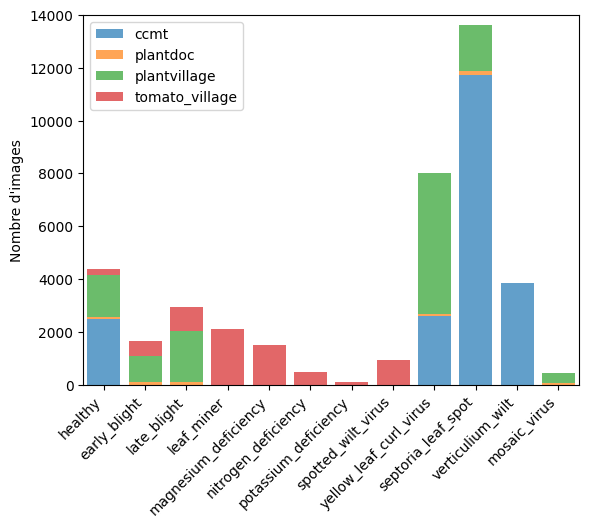

In [113]:
# Nombre d'images par catégorie et par source
classes = dataset.columns.drop(["filename", "source"])

counts = dataset.drop("filename", axis=1).groupby("source").sum()
counts

# Bar plot pour les totaux de chaque classe (par source)
fig, ax = plt.subplots()

bottom = np.zeros(len(classes))

x = np.arange(len(classes))

colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]

for i, src in enumerate(counts.index):
    values = counts.loc[src].values
    color = colors[i]
    ax.bar(x, values, bottom=bottom, label=src, color=(color, 0.7))
    bottom += values

ax.legend()
ax.set_xlim(-0.5, len(classes) - 0.5)
ax.set_xticks(x, labels=classes, rotation=45, ha="right")
ax.set_ylabel("Nombre d'images")

fig.savefig("tomato_dataset.png", dpi=300, bbox_inches="tight")

In [156]:
# Random number generator
rng = np.random.default_rng(3456789012)

size = 10
#fig, axes = plt.subplots(size, 12, figsize=(30, 20))

#dataset.query("healthy == 1")
path = pathlib.Path("tomato")

colors = {
    "ccmt": "tab:blue",
    "plantdoc": "tab:orange",
    "plantvillage": "tab:green",
    "tomato_village": "tab:red",
}

for i, cls in enumerate(classes):
    fig, axes = plt.subplots(8, 8, figsize=(15, 15), layout="tight")
    subset = dataset.query(f"{cls} == 1")
    files = rng.choice(subset.index, size=len(axes.flatten()), replace=False)

    for j, file in enumerate(files):
        ax = axes.flatten()[j]

        filename = subset.loc[file, "filename"]
        source = subset.loc[file, "source"]

        img = np.asarray(PIL.Image.open(path / filename))
        ax.imshow(img)
        
        color = colors[source]
        ax.set_title(f"#{file} ({source})", color=color, fontsize=9)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        
        for spine in ax.spines:
            ax.spines[spine].set_color(color)
            ax.spines[spine].set_linewidth(2)

    fig.suptitle(f"Classe: {cls}", fontsize=16, fontweight="bold", x=0.5, y=1)
    fig.savefig(f"tomato_sample_{cls}.png", dpi=300, bbox_inches="tight")
    plt.close(fig)

